In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [0]:
party = pd.read_csv('party2175.csv')
sleep = pd.read_csv('sleep2992.csv')
hiphop = pd.read_csv('hiphop2157.csv')
workout = pd.read_csv('workout1904.csv')
relax = pd.read_csv('relax2369.csv')
focus = pd.read_csv('focus2653.csv')

In [18]:
party.head()

,tempo,liveness,instrumentalness,acousticness,speechiness,loudness,energy,danceability
0,128.024,0.337,0.000005,0.0134,0.0424,-5.057,0.852,0.732
1,137.948,0.115,0.000000,0.1820,0.0608,-4.852,0.739,0.766
2,127.976,0.139,0.000000,0.4810,0.0421,-6.436,0.685,0.762
3,109.964,0.106,0.000000,0.4050,0.0804,-4.657,0.768,0.815
4,124.002,0.110,0.000000,0.0722,0.0319,-6.403,0.703,0.646


In [0]:
hiphop_y = np.array([1 for x in range(len(hiphop))])
hiphop_y = np.reshape(hiphop_y,(len(hiphop),-1))
party_y = np.array([1 for x in range(len(party))])
party_y = np.reshape(party_y,(len(party),-1))
sleep_y = np.array([0 for x in range(len(sleep))])
sleep_y = np.reshape(sleep_y,(len(sleep),-1))
workout_y = np.array([1 for x in range(len(workout))])
workout_y = np.reshape(workout_y,(len(workout),-1))
relax_y = np.array([0 for x in range(len(relax))])
relax_y = np.reshape(relax_y,(len(relax),-1))
focus_y = np.array([0 for x in range(len(focus))])
focus_y = np.reshape(focus_y,(len(focus),-1))

In [0]:
Y = np.concatenate((party_y, sleep_y), axis=0)
Y = np.concatenate((Y, hiphop_y), axis=0)
Y = np.concatenate((Y, workout_y), axis=0)
Y = np.concatenate((Y, relax_y), axis=0)
Y = np.concatenate((Y, focus_y), axis=0)

In [0]:
from tensorflow.keras.utils import to_categorical
Y = to_categorical(Y, 2)

In [0]:
X = np.concatenate((party, sleep), axis=0)
X = np.concatenate((X, hiphop), axis=0)
X = np.concatenate((X, workout), axis=0)
X = np.concatenate((X, relax), axis=0)
X = np.concatenate((X, focus), axis=0)

In [0]:
X[0,] = X[0,]/128.024 # normaliztion
X[1,] = X[1,]/137.94799999999998
X[2,] = X[2,]/127.976
X[3,] = X[3,]/109.964
X[4,] = X[4,]/124.00200000000001
X[5,] = X[5,]/144.974
X[6,] = X[6,]/117.956
X[7,] = X[7,]/112.02

In [26]:
a = 0
while a in range(8):
  print(np.max(X[a, ]))
  a = a+1

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.1, random_state = 87)

In [29]:
model = Sequential()
model.add(Dense(30, input_dim = 8, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

#組裝
model.compile(loss = 'mse', optimizer = SGD(lr = 0.09), metrics = ['accuracy'])
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_7 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 62        
Total params: 1,262
Trainable params: 1,262
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = model.fit(x_train, y_train, batch_size=10, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1283/1283 [==============================] - 3s 2ms/step - loss: 0.5620 - accuracy: 0.4381 - val_loss: 0.5692 - val_accuracy: 0.4309
Epoch 2/20
1283/1283 [==============================] - 3s 2ms/step - loss: 0.5617 - accuracy: 0.4384 - val_loss: 0.5692 - val_accuracy: 0.4309
Epoch 3/20
1283/1283 [==============================] - 3s 2ms/step - loss: 0.5617 - accuracy: 0.4384 - val_loss: 0.5692 - val_accuracy: 0.4309
Epoch 4/20
1283/1283 [==============================] - 3s 2ms/step - loss: 0.5615 - accuracy: 0.4384 - val_loss: 0.5636 - val_accuracy: 0.4365
Epoch 5/20
1283/1283 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.4432 - val_loss: 0.5636 - val_accuracy: 0.4365
Epoch 6/20
1283/1283 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.4432 - val_loss: 0.5636 - val_accuracy: 0.4365
Epoch 7/20
1283/1283 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.4432 - val_loss: 0.5636 - val_accuracy:

In [33]:
from keras.models import Sequential
from keras.layers import Dense
model1=Sequential()
model1.add(Dense(units=256, input_dim=8, kernel_initializer='normal',  activation='relu'))
model1.add(Dense(units=2, kernel_initializer='normal',  activation='softmax'))   
model1.summary()   

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               2304      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 514       
Total params: 2,818
Trainable params: 2,818
Non-trainable params: 0
_________________________________________________________________


In [35]:
model1.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])  
train_history=model1.fit(X,Y,
                         validation_split=0.2, epochs=10, 
                         batch_size=20, verbose=2)  

Train on 11400 samples, validate on 2850 samples
Epoch 1/10
 - 1s - loss: 0.2040 - accuracy: 0.9244 - val_loss: 0.0896 - val_accuracy: 0.9596
Epoch 2/10
 - 1s - loss: 0.2042 - accuracy: 0.9259 - val_loss: 0.1212 - val_accuracy: 0.9463
Epoch 3/10
 - 1s - loss: 0.2031 - accuracy: 0.9227 - val_loss: 0.1784 - val_accuracy: 0.9168
Epoch 4/10
 - 1s - loss: 0.1976 - accuracy: 0.9268 - val_loss: 0.1545 - val_accuracy: 0.9281
Epoch 5/10
 - 1s - loss: 0.1959 - accuracy: 0.9273 - val_loss: 0.1156 - val_accuracy: 0.9505
Epoch 6/10
 - 1s - loss: 0.1962 - accuracy: 0.9260 - val_loss: 0.1911 - val_accuracy: 0.9175
Epoch 7/10
 - 1s - loss: 0.1950 - accuracy: 0.9265 - val_loss: 0.0734 - val_accuracy: 0.9667
Epoch 8/10
 - 1s - loss: 0.1930 - accuracy: 0.9257 - val_loss: 0.1025 - val_accuracy: 0.9568
Epoch 9/10
 - 1s - loss: 0.1949 - accuracy: 0.9247 - val_loss: 0.1158 - val_accuracy: 0.9509
Epoch 10/10
 - 1s - loss: 0.1903 - accuracy: 0.9282 - val_loss: 0.1177 - val_accuracy: 0.9498


In [0]:
#show_train_history.py
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def show_train_history(train_history):
    fig=plt.gcf()
    fig.set_size_inches(16, 6)
    plt.subplot(121)
    plt.plot(train_history.history["accuracy"])
    plt.plot(train_history.history["val_accuracy"])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(["train", "validation"], loc="upper left")
    plt.subplot(122)
    plt.plot(train_history.history["loss"])
    plt.plot(train_history.history["val_loss"])
    plt.title("Train History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

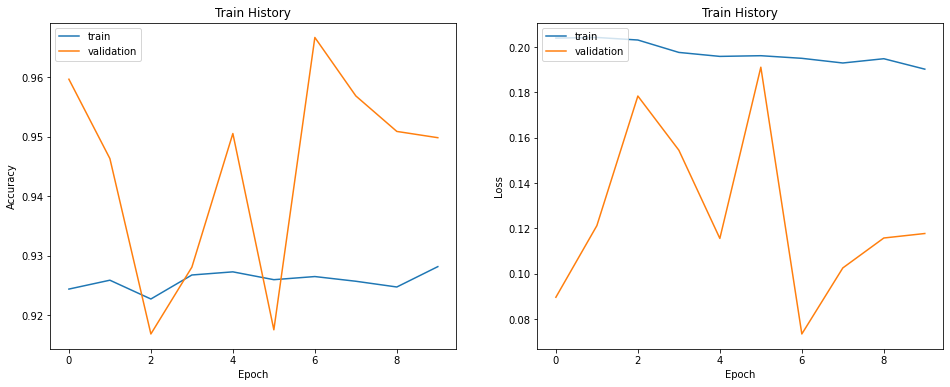

In [41]:
show_train_history(train_history)